<a href="https://colab.research.google.com/github/alex-bolshunov/Plant-Disease-Detection/blob/main/plant_disease_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup


In [554]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [555]:
class Models_metrics:
  def __init__(self):
    self.metrics_dict = {}

  def get_metrics_dict(self):
    return self.metrics_dict

  def calculate_metrics(self, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='binary')
    return {"accuracy":accuracy, "precision":precision, "recall":recall, "f1_score":f1}

  def update(self, name, y_test, y_pred):
    self.metrics_dict[name] = self.calculate_metrics(y_test, y_pred)

  def print_metrics(self, name, p = 5):
    print(f"Model name: {name}")
    for key, value in self.metrics_dict[name].items():
      print(f"{key.capitalize()}: {round(value, p)}.")

  def plot_confucion_matrix(self, y_test, y_pred, title = "", labels = ["sick", "healthy"], cmap = "Blues"):
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels=labels)
    cm_display.plot(cmap=cmap)
    if title: plt.title(title)
    plt.show();

  def plot_roc_curve(self, y_test, y_scores, name = ""):
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray')
    plt.fill_between(fpr, tpr, 0, color='lightblue')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve ' + name)
    plt.legend(loc='lower right')
    plt.grid(alpha = 0.3)
    plt.show();

  def plot_precision_recall(self, y_test, y_scores, name = ""):
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    plt.plot(recall, precision, color='blue', label="Precision-Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve " + name)
    plt.legend(loc="lower left")
    plt.grid(alpha=0.3)
    plt.show();



In [556]:
#constants
N_ROWS = 3
RANDOM_STATE = 42
TEST_SIZE = 0.25
IMG = "image_path"
LBL = "label"

In [557]:
!curl "https://raw.githubusercontent.com/alex-bolshunov/Plant-Disease-Detection/refs/heads/main/data/plants.csv" -o plants.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12.5M  100 12.5M    0     0  23.1M      0 --:--:-- --:--:-- --:--:-- 23.1M


In [558]:
df = pd.read_csv("plants.csv")

In [559]:
df.head(N_ROWS)

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,label
0,0.822657,1.772103,0.551618,0.825739,1.237338,0.610392,0.107138,0.012374,1.682841,0.008460,...,0.171460,0.104246,5.655696,1.885628,0.124191,1.158248,0.432221,0.005591,1.977743,Pepper__bell___Bacterial_spot
1,0.652631,0.144246,0.118700,0.911722,0.292335,1.430772,0.218819,0.652375,2.447339,0.194902,...,0.855916,1.533810,2.646348,0.228621,0.233222,1.675443,0.215615,0.221080,2.943224,Pepper__bell___Bacterial_spot
2,1.429725,0.812403,0.220558,0.241219,1.728315,1.274676,0.284197,0.598039,0.612824,0.291447,...,0.093914,0.426252,1.124067,0.477904,0.083384,0.762229,0.412596,0.115656,1.427429,Pepper__bell___Bacterial_spot


In [560]:
#encode lables
encoder = LabelEncoder()

df.loc[:, LBL] = encoder.fit_transform(df.loc[:, LBL])

In [561]:
#initialize metrics obj
metrics = Models_metrics()

# SVM

In [562]:
#get features and labels
robust = RobustScaler()

X, y = robust.fit_transform(df.drop(LBL, axis = 1)), df.loc[:, LBL].to_numpy().astype("int")

In [563]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [564]:
#define and train a model
svm = SVC(kernel = "rbf")

svm.fit(X_train, y_train)

SVC()

In [565]:
#predict class
y_pred = svm.predict(X_test)

In [566]:
#get metrics
name = "svm"

metrics.update(name, y_test, y_pred)
metrics.print_metrics(name)

Model name: svm
Accuracy: 0.99031.
Precision: 0.98953.
Recall: 0.99474.
F1_score: 0.99213.


In [567]:
#get y scores
y_scores = svm.decision_function(X_test)

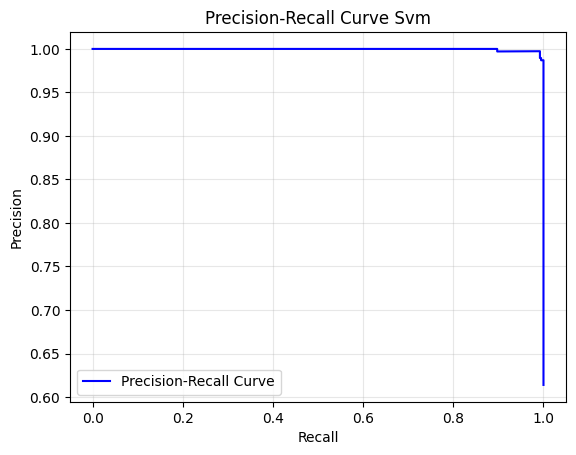

In [568]:
#plot precision recall curve
metrics.plot_precision_recall(y_test, y_scores, name = name.capitalize())

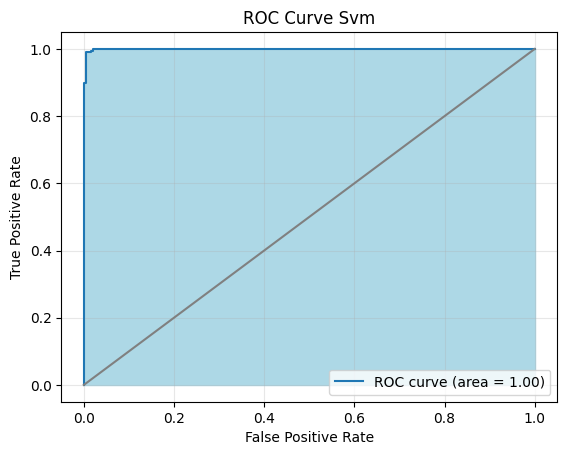

In [569]:
#plot roc curve
metrics.plot_roc_curve(y_test, y_scores, name.capitalize())

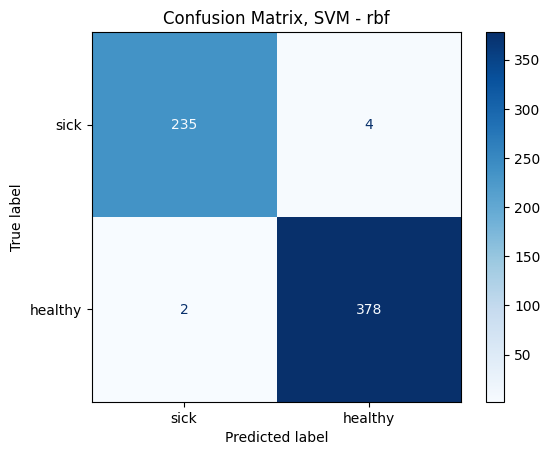

In [570]:
#plot confusion matrix
metrics.plot_confucion_matrix(y_test, y_pred, "Confusion Matrix, SVM - rbf")

# Decision Tree

In [571]:
#get features and labels
X, y = df.drop(LBL, axis = 1), df.loc[:, LBL].to_numpy().astype("int")

In [572]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [573]:
#define and train a model
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=RANDOM_STATE)

decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [574]:
#predict
y_pred = decision_tree.predict(X_test)

In [575]:
#get metrics
name = "decision tree"

metrics.update(name, y_test, y_pred)
metrics.print_metrics(name)

Model name: decision tree
Accuracy: 0.91276.
Precision: 0.91795.
Recall: 0.94211.
F1_score: 0.92987.


In [576]:
#get depth
depth = decision_tree.get_depth()
print(f"The depth of the model is {depth}.")

The depth of the model is 5.


In [577]:
#get y scores
y_scores = decision_tree.predict_proba(X_test)[:, 1]

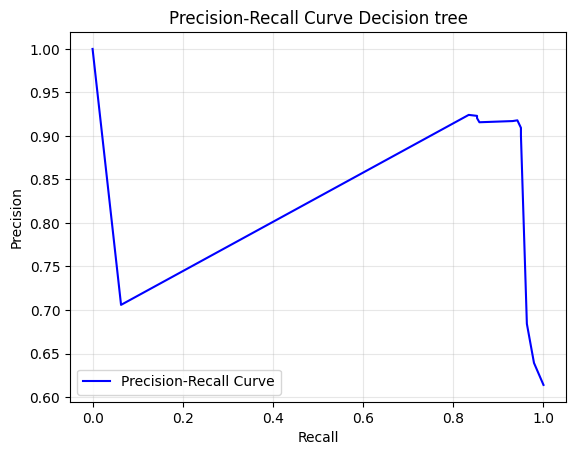

In [578]:
#plot precision recall curve
metrics.plot_precision_recall(y_test, y_scores, name = name.capitalize())

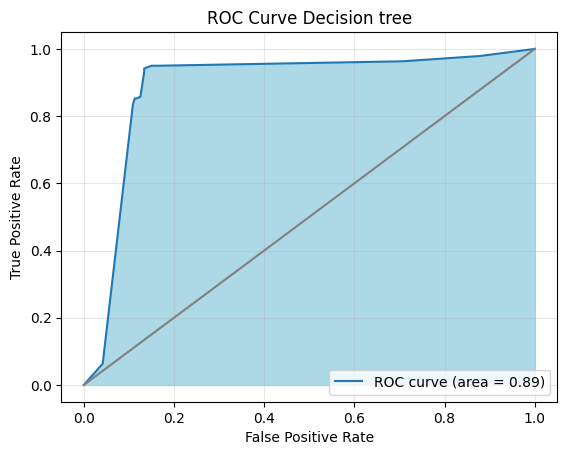

In [579]:
#plot roc curve
metrics.plot_roc_curve(y_test, y_scores, name.capitalize())

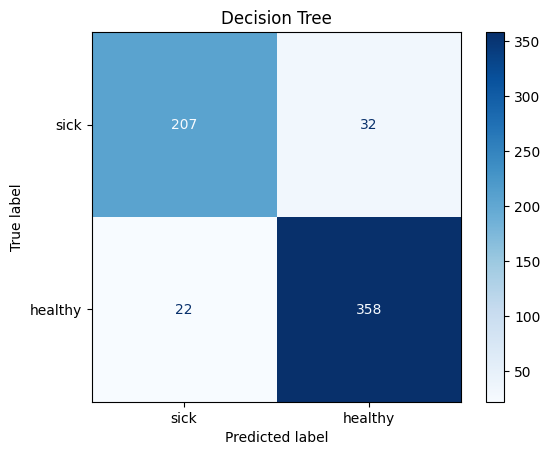

In [580]:
#plot confusion matrix
metrics.plot_confucion_matrix(y_test, y_pred, "Decision Tree")

# Naive Bayes

In [581]:
#get features and labels
X, y = df.drop(LBL, axis = 1), df.loc[:, LBL].to_numpy().astype("int")

In [582]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [583]:
#define and train model
naive_bayes = GaussianNB()

naive_bayes.fit(X_train, y_train)

GaussianNB()

In [584]:
#predict
y_pred = naive_bayes.predict(X_test)

In [585]:
#get metrics
name = "naive bayes"

metrics.update(name, y_test, y_pred)
metrics.print_metrics(name)

Model name: naive bayes
Accuracy: 0.93538.
Precision: 0.96448.
Recall: 0.92895.
F1_score: 0.94638.


In [586]:
#get y scores
y_scores = naive_bayes.predict_proba(X_test)[:, 1]

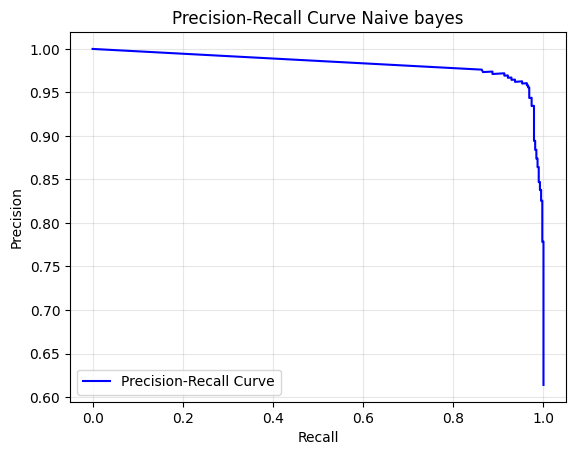

In [587]:
#plot precision recall curve
metrics.plot_precision_recall(y_test, y_scores, name = name.capitalize())

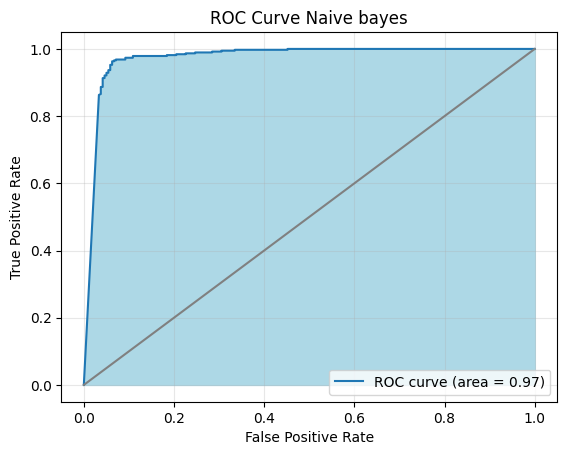

In [588]:
#plot roc curve
metrics.plot_roc_curve(y_test, y_scores, name.capitalize())

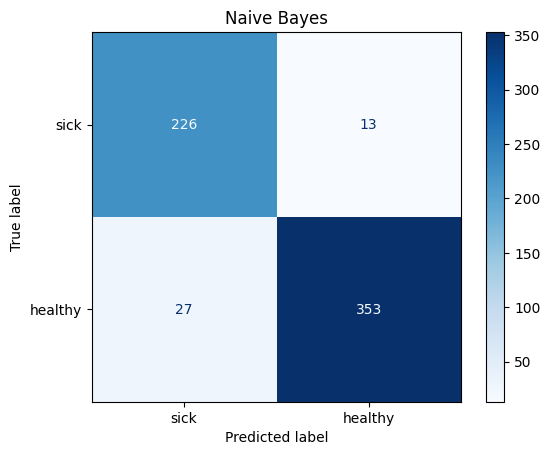

In [589]:
#plot confusion matrix
metrics.plot_confucion_matrix(y_test, y_pred, "Naive Bayes")

# KNN

In [590]:
#get features and labels
robust = RobustScaler()

X, y = robust.fit_transform(df.drop(LBL, axis = 1)), df.loc[:, LBL].to_numpy().astype("int")

In [591]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

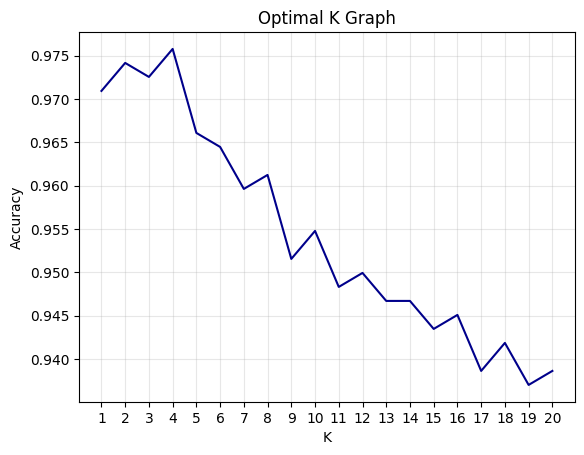

In [592]:
acc = []
k_values = np.arange(1,21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))

plt.plot(k_values, acc, c = "darkblue", zorder = 5)
plt.xticks(k_values)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Optimal K Graph")
plt.grid(alpha = 0.3, zorder = 1)
plt.show()


In [593]:
#define and train model
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [594]:
#predict
y_pred = knn.predict(X_test)

In [595]:
#get metrics
name = "knn"

metrics.update(name, y_test, y_pred)
metrics.print_metrics(name)

Model name: knn
Accuracy: 0.97577.
Precision: 0.97158.
Recall: 0.98947.
F1_score: 0.98044.


In [596]:
#get y scores
y_scores = knn.predict_proba(X_test)[:, 1]

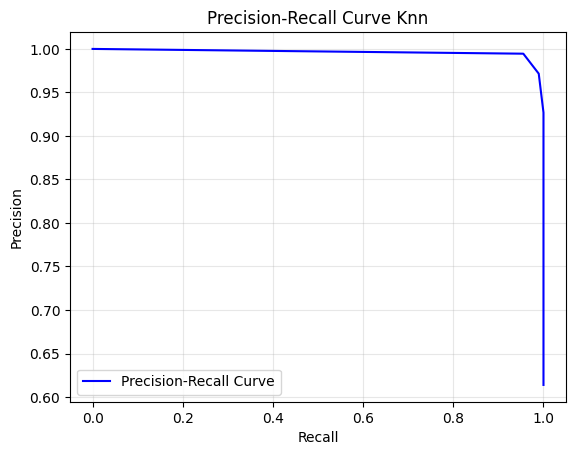

In [597]:
#plot precision recall curve
metrics.plot_precision_recall(y_test, y_scores, name = name.capitalize())

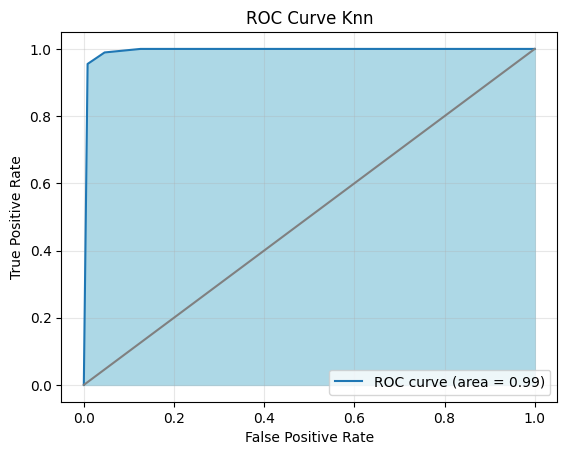

In [598]:
#plot roc curve
metrics.plot_roc_curve(y_test, y_scores, name.capitalize())

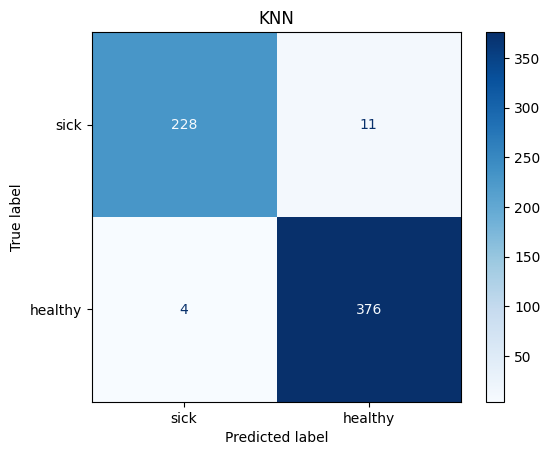

In [599]:
#plot confusion matrix
metrics.plot_confucion_matrix(y_test, y_pred, "KNN")

# Perceptron

In [600]:
#get features and labels
X, y = df.drop(LBL, axis = 1), df.loc[:, LBL].to_numpy().astype("int")

In [601]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [602]:
#define and train model
perceptron = Perceptron()

perceptron.fit(X_train, y_train)

Perceptron()

In [603]:
#predict
y_pred = perceptron.predict(X_test)

In [604]:
#get metrics
name = "perceptron"

metrics.update(name, y_test, y_pred)
metrics.print_metrics(name)

Model name: perceptron
Accuracy: 0.99515.
Precision: 0.99475.
Recall: 0.99737.
F1_score: 0.99606.


In [605]:
#get y scores
y_scores = perceptron.decision_function(X_test)

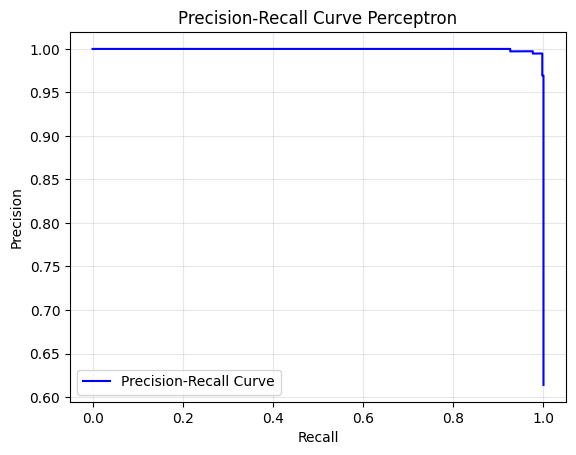

In [606]:
#plot precision recall curve
metrics.plot_precision_recall(y_test, y_scores, name = name.capitalize())

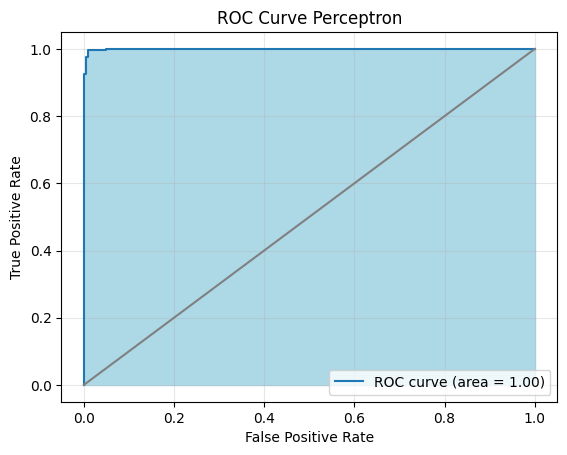

In [607]:
#plot roc curve
metrics.plot_roc_curve(y_test, y_scores, name = name.capitalize())

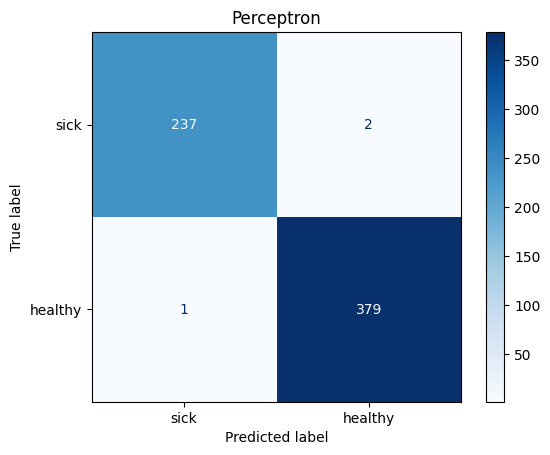

In [608]:
#plot confusion matrix
metrics.plot_confucion_matrix(y_test, y_pred, name.capitalize())